## Students Information

Please enter the names and IDs of the two students below:

1. **Name**: [Enter Student 1 Name Here]  
   **ID**: `9XXXXXX` 

2. **Name**: [Enter Student 2 Name Here]  
   **ID**: `9XXXXXX` 


## Students Instructions

This is your first graded lab assignment, as you put the work you have studied in the lectures in action, please take this opportunity to enhance your understanding of the concepts and hone your skills. As you work on your assignment, please keep the following instructions in mind:

- Clearly state your personal information where indicated.
- Be ready with your work before the time of the next discussion slot in the schedule.
- Plagiarism will be met with penalties, refrain from copying any answers to make the most out of the assignment. If any signs of plagiarism are detected, actions will be taken.
- It is acceptable to share the workload of the assignment bearing the discussion in mind.
- Feel free to [reach out](mailto:cmpsy27@gmail.com) if there were any ambiguities or post on the classroom.

## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!





## Installation Instructions

In this lab assignment, we require additional Python libraries for scientific mathematics, particularly in the context of machine learning (ML) and satellite image analysis. To fulfill these requirements, we need to install Scikit-learn and Scikit-image. 
1. Install Scikit-learn  
Scikit-learn (Sklearn) is a powerful Python library for ML tasks, offering various algorithms for classification, regression, clustering, and model evaluation. It is extensively used for analyzing satellite imagery, enabling tasks such as land cover classification and environmental parameter prediction. On the other hand, Scikit-image (Skimage) provides comprehensive tools for image processing and computer vision, facilitating tasks such as image preprocessing, feature extraction, and segmentation. These libraries are essential for extracting valuable insights from satellite images and conducting advanced analysis in scientific computing and research domains.
```bash
pip install scikit-learn scikit-image
```


> **Note:** You are allowed to install any other necessary libraries you deem useful for solving the lab. Please ensure that any additional libraries are compatible with the project requirements and are properly documented in your submission.


## Maximum Likelihood Estimator (MLE) Classifier
The Maximum Likelihood Estimator (MLE) is a fundamental statistical approach used to infer the parameters of a given distribution that are most likely to result in the observed data. In the context of image classification, MLE helps to quantify the probability of observing the data within each predefined class based on their distinct statistical properties. This method is highly effective for classifying images into categories by comparing the likelihoods of the data under different model parameters, enabling the most probable class assignment.

1. **Calculate Class Priors**: Estimate the probability of each class based on the training dataset. This is expressed as:
   $$
   P(C_k) = \frac{N_k}{N}
   $$
   where \(N_k\) is the number of samples of class \(k\) and \(N\) is the total number of samples.

2. **Estimate Class-specific Parameters**: For each class, estimate parameters such as the mean \(\mu_k\) and covariance \(\Sigma_k\) of features that describe the distribution of the data:
   $$
   \mu_k = \frac{1}{N_k} \sum_{x \in C_k} x
   $$
   $$
   \Sigma_k = \frac{1}{N_k} \sum_{x \in C_k} (x - \mu_k)(x - \mu_k)^T
   $$

3. **Compute Likelihoods**: For a given test instance \(x\), compute the likelihood of that instance belonging to each class using the estimated parameters:
   $$
   p(x | C_k) = \frac{1}{(2\pi)^{d/2} |\Sigma_k|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)\right)
   $$

4. **Classify Based on Maximum Likelihood**: Assign the class label to each test instance based on the highest likelihood, which can be calculated as:
   $$
   \hat{y} = \arg\max_{k} P(C_k) \cdot p(x | C_k)
   $$

The Naive Bayes classifier is perhaps the most well-known application of the Maximum Likelihood Estimator principle in classification tasks. It assumes that the features in each class are independent, simplifying the computation of likelihoods. While Naive Bayes is popular for its simplicity and efficiency, it is not the only technique that leverages the MLE approach. Other classical alternatives include Logistic Regression, which applies MLE to estimate the parameters that best predict categorical outcomes, and Gaussian Mixture Models, which use MLE to estimate the parameters of multiple Gaussian distributions within the data. Students are encouraged to explore these models to gain a deeper understanding of statistical estimation techniques.


## Req- Image Classification for EuroSATallBands
Image classification is a key challenge in satellite imaging and remote sensing. As discussed in the lecture, this task is typically conducted on a pixel-wise basis because a single image can contain multiple textural elements of different celestial features. However, for this specific assignment, we will focus on identifying the dominant phenomena in the image as the basis for classification.

- **Load the Images**: Load the images of the EuroSAT dataset that belong to the **residential**, **river**, and **forest** classes.

- **Split the Dataset**: Split the dataset such that 10% of each class is used as testing data, and the remainder is used for training your classifier. Use the indices provided by `np.random.choice` with seed set to `27`. **Code is provided do not change it**.

- **Feature Extraction**: Extract suitable features from the images that you think might be relevant in distinguishing each class from the others. Keep in mind the curse of dimensionality when selecting features.

- **Implement a Maximum Likelihood Estimator (MLE)**: Implement a Maximum Likelihood Estimator (MLE) based on your training data. 
- **Report Accuracy and Average F1 Score**: After testing your classifier on the test set, report the **Accuracy** and **Average F1 Score** of your model.


In [19]:
# Add your libraries here
import numpy as np
import cv2
import os
from skimage import io
import rasterio
import matplotlib.pyplot as plt


In [2]:
# DO NOT CHANGE THIS CELL
## Training set indices.
np.random.seed(27)  # Set random seed for reproducibility

# Randomly select indices for the test sets for each class
residential_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
forest_test_indices = np.random.choice(np.arange(3000), size=300, replace=False)
river_test_indices = np.random.choice(np.arange(2500), size=250, replace=False)


### Step(1) Load Images

In [3]:
def load_raster_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        with rasterio.open(filepath) as src:
            img = src.read()
            # Check if the image has multiple bands
            if len(img.shape) == 3:  # If it's a multi-band image
                # Reshape the image to (bands, height, width)
                img = np.moveaxis(img, 0, -1)

            images.append(img)
    # Convert list of arrays to a single 3D array
    images = np.stack(images)
    return images  # no,w,h,c

residential_images = load_raster_images_from_folder('./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif/Residential')
print("Residential images shape: ", residential_images.shape)

forest_images = load_raster_images_from_folder('./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif/Forest')
print("Forest images shape: ", forest_images.shape)

river_images = load_raster_images_from_folder('./EuroSATallBands/ds/images/remote_sensing/otherDatasets/sentinel_2/tif/River')
print("River images shape: ", river_images.shape)


Residential images shape:  (3000, 64, 64, 13)
Forest images shape:  (3000, 64, 64, 13)
River images shape:  (2500, 64, 64, 13)


In [4]:
# Determine the number of bands
num_bands = residential_images.shape[-1]

### Step(2) Split Data into Train & Test

In [5]:
mask=np.zeros(len(residential_images),dtype=bool)
mask[residential_test_indices]=True
residential_images_train=residential_images[~ mask]
residential_images_test=residential_images[mask]
print("Residential train images shape: ", residential_images_train.shape)
print("Residential test images shape: ", residential_images_test.shape)

mask=np.zeros(len(forest_images),dtype=bool)
mask[forest_test_indices]=True
forest_images_train=forest_images[~ mask]
forest_images_test=forest_images[mask]
print("Forest train images shape: ", forest_images_train.shape)
print("Forest test images shape: ", forest_images_test.shape)

mask=np.zeros(len(river_images),dtype=bool)
mask[river_test_indices]=True
river_images_train=river_images[~mask]
river_images_test=river_images[mask]
print("River train images shape: ", river_images_train.shape)
print("River test images shape: ", river_images_test.shape)



Residential train images shape:  (2700, 64, 64, 13)
Residential test images shape:  (300, 64, 64, 13)
Forest train images shape:  (2700, 64, 64, 13)
Forest test images shape:  (300, 64, 64, 13)
River train images shape:  (2250, 64, 64, 13)
River test images shape:  (250, 64, 64, 13)


## Approach(1): [Raw Pixels Classification]

### Step(3) Feature Extraction

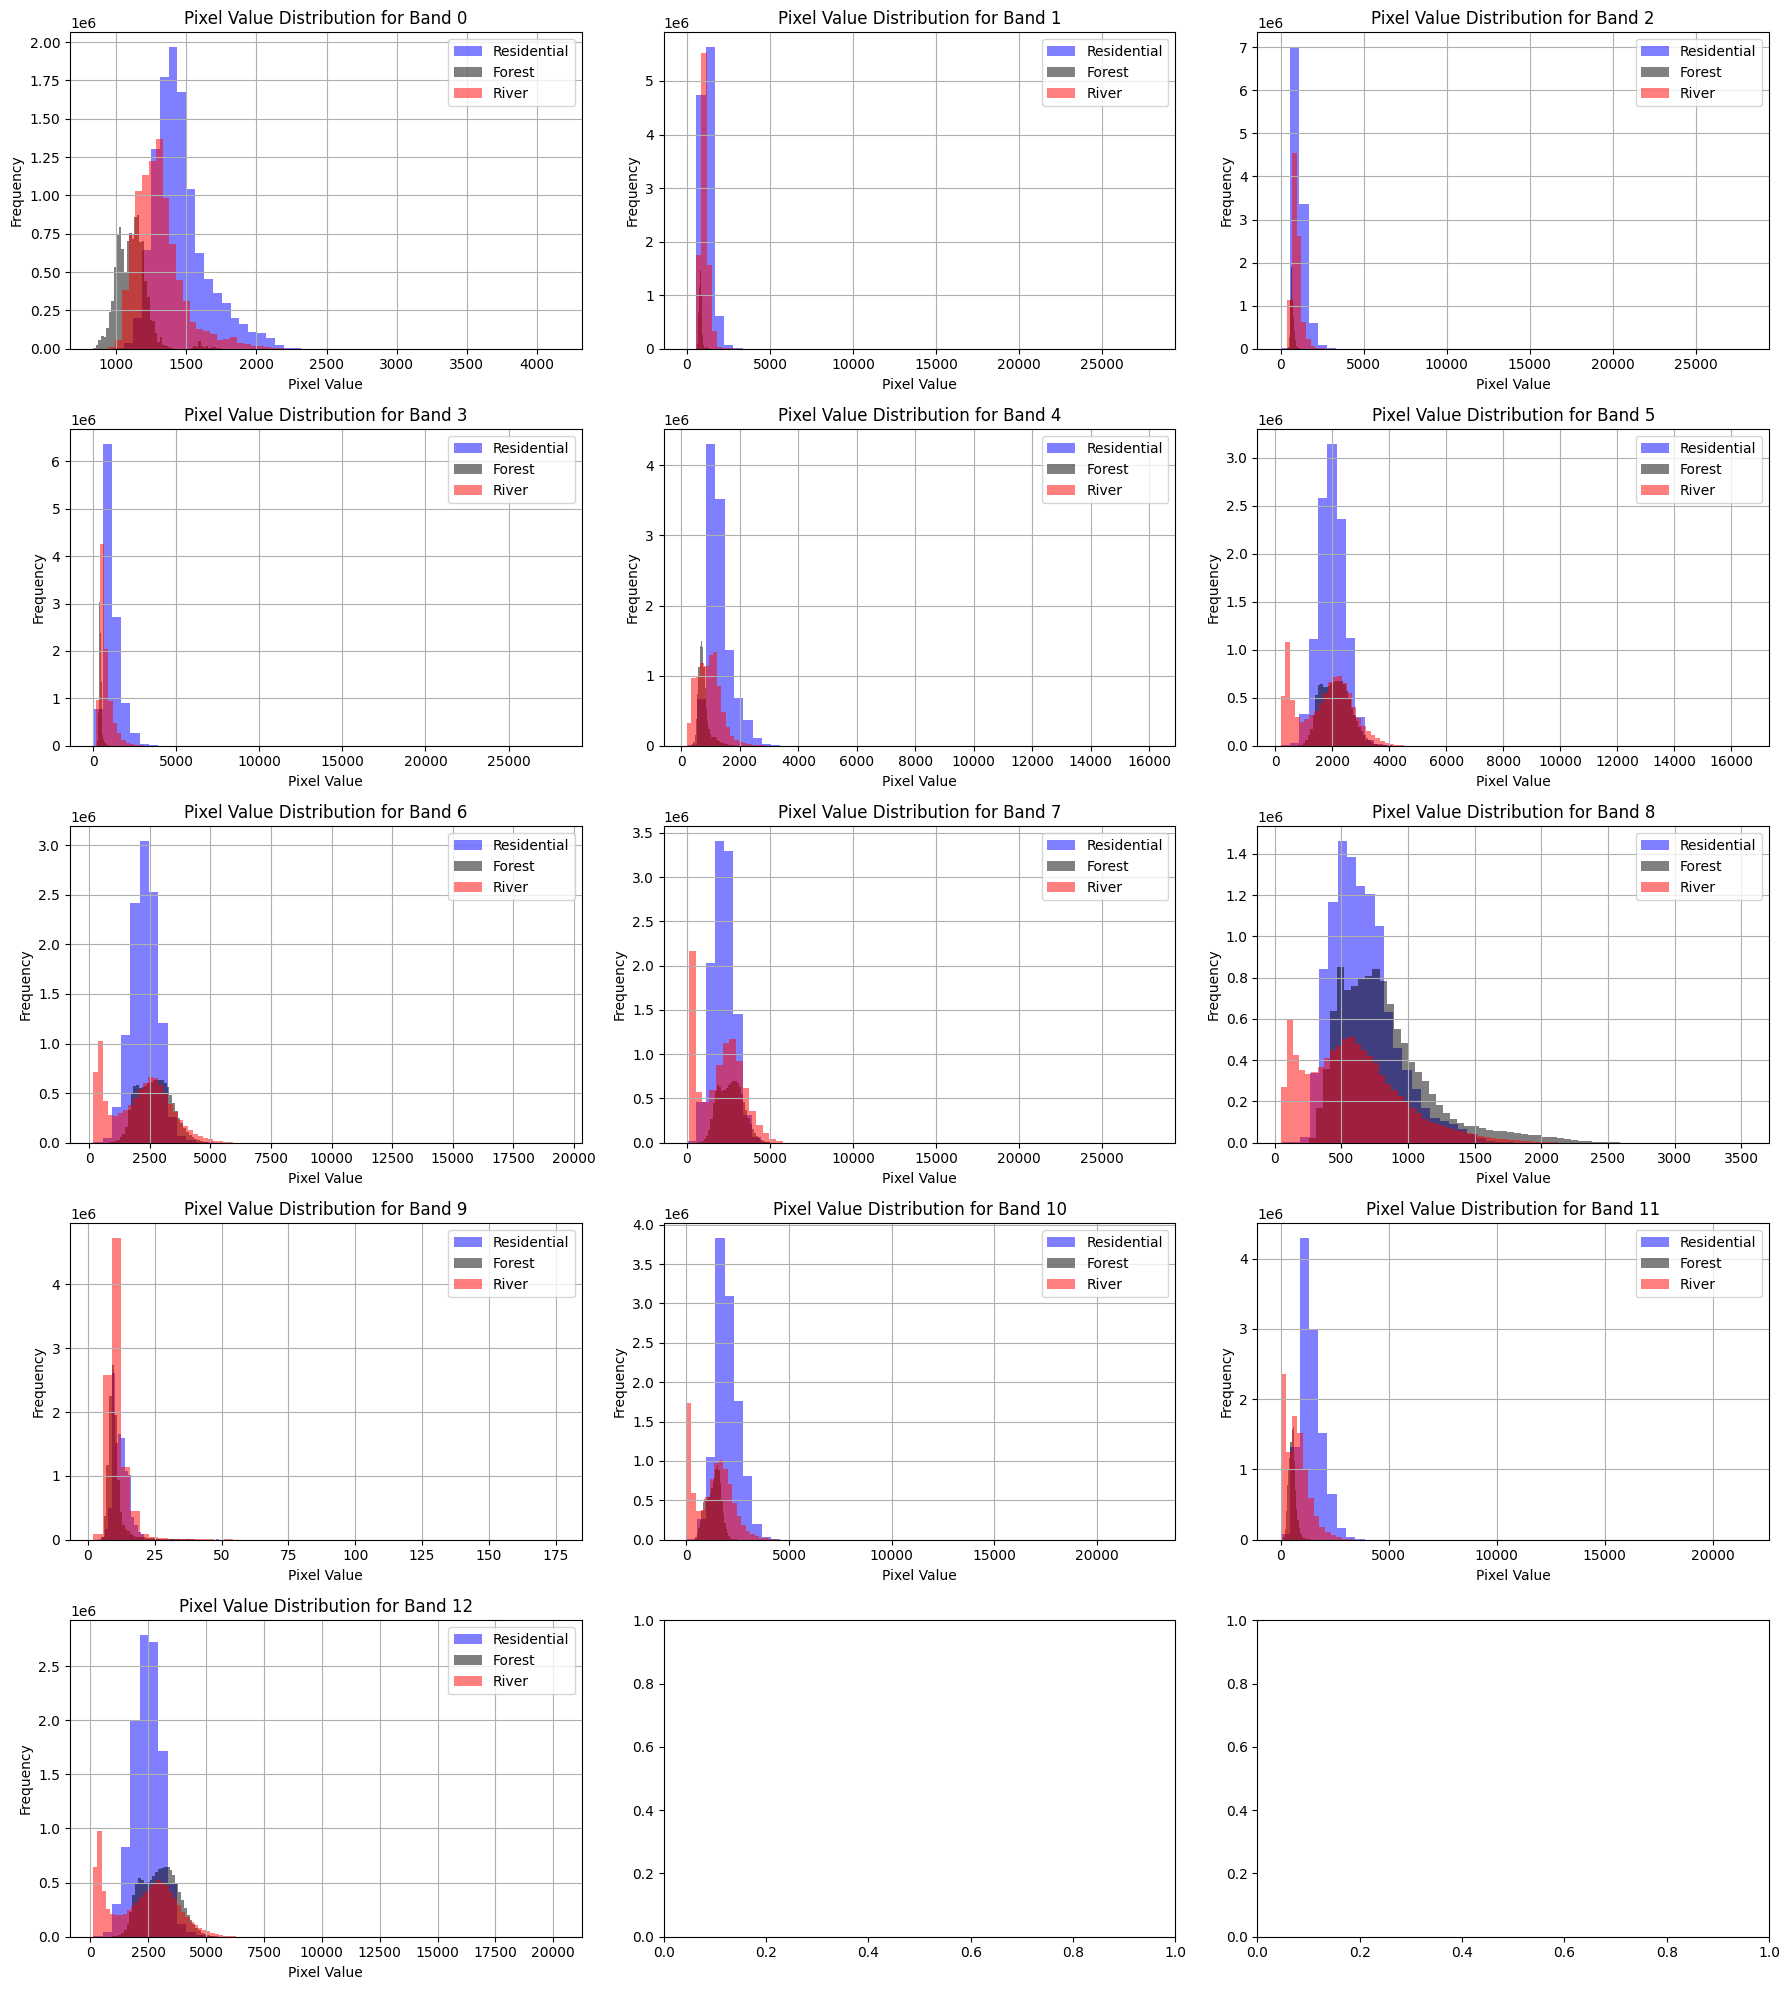

In [55]:
# Calculate the number of rows needed based on three plots per row
num_rows = (num_bands + 2) // 3

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4*num_rows))

# Iterate over each band
for band_idx in range(num_bands):
    # Extract pixel values for the current band for each class
    residential_band_values = residential_images_train[:, :, :, band_idx]
    forest_band_values = forest_images_train[:, :, :, band_idx]
    river_band_values = river_images_train[:, :, :, band_idx]
    
    # Determine the subplot position
    row_idx = band_idx // 3
    col_idx = band_idx % 3
    
    # Plot the pixel values for the current band for each class
    axes[row_idx, col_idx].hist(residential_band_values.ravel(), bins=50, color='blue', alpha=0.5, label='Residential')
    axes[row_idx, col_idx].hist(forest_band_values.ravel(), bins=50, color='black', alpha=0.5, label='Forest')
    axes[row_idx, col_idx].hist(river_band_values.ravel(), bins=50, color='red', alpha=0.5, label='River')
    axes[row_idx, col_idx].set_xlabel('Pixel Value')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].set_title(f'Pixel Value Distribution for Band {band_idx}')
    axes[row_idx, col_idx].grid(True)
    axes[row_idx, col_idx].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [92]:
# bands=[0,4,10,11,12] #0.90
bands=[0,4,8,10,11,12] #0.91
# bands=[0,4,5,8,10,11,12] #0.91
# bands=[0,4,5,8,10] #0.87
# bands=[0,4,10,12]  #0.86
# bands=[0,4,12] #0.83
# bands=[1,2,3] #RGB #0.70
# bands=[0] #0.65
# bands=[8] #0.47

bands_mask=np.zeros(num_bands,dtype=bool)
bands_mask[bands]=True
print("bands_mask",bands_mask)

bands_mask [ True False False False  True  True False False  True False  True  True
  True]


### Step(4) MLE

In [93]:
# Step(1) Cal class Priors
p_residential = len(residential_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))
p_forest = len(forest_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))
p_river = len(river_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))

print("--------Class Priors---------")
print(f'P(Residential) = {p_residential:.2f}')
print(f'P(Forest) = {p_forest:.2f}')
print(f'P(River) = {p_river:.2f}')

# Step(2) Calculate the mean and standard deviation for each feature for each class
print("\n---------Class Mean & Covariance Matrix----------")
# Compute Mean
mean_residential = np.mean(residential_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
print("Residential Mean: ", mean_residential)
# Compute Covariance Matrix
covariance_matrix_residential = np.cov(residential_images_train[:,:,:,bands_mask].reshape(-1,residential_images_train[:,:,:,bands_mask].shape[-1]), rowvar=False)
print("Residential Covariance Matrix:\n", covariance_matrix_residential)


# Compute Mean
mean_forest = np.mean(forest_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
print("Forest Mean: ", mean_forest)
# Compute Covariance Matrix
covariance_matrix_forest = np.cov(forest_images_train[:,:,:,bands_mask].reshape(-1,forest_images_train[:,:,:,bands_mask].shape[-1]), rowvar=False)
print("Forest Covariance Matrix:\n", covariance_matrix_forest)


# Compute Mean
mean_river = np.mean(river_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
print("River Mean: ", mean_river)
# Compute Covariance Matrix
covariance_matrix_river = np.cov(river_images_train[:,:,:,bands_mask].reshape(-1,river_images_train[:,:,:,bands_mask].shape[-1]), rowvar=False)
print("River Covariance Matrix:\n", covariance_matrix_river)

--------Class Priors---------
P(Residential) = 0.35
P(Forest) = 0.35
P(River) = 0.29

---------Class Mean & Covariance Matrix----------
Residential Mean:  [1459.61242793 1287.8791107  1980.4978606   664.42014061 1974.84656675
 1382.01246672 2469.38278881]
Residential Covariance Matrix:
 [[ 35794.58614781  43870.42186616  11520.07132655   -818.20954056
   35044.60922131  42692.76782173  -5232.64535483]
 [ 43870.42186616 148163.14328708 117831.74442048  35331.67602105
  191144.35344324 173109.19502816 110449.4921307 ]
 [ 11520.07132655 117831.74442048 202329.02622183  62495.55602318
  187853.02542501 122530.15973733 259324.97870097]
 [  -818.20954056  35331.67602105  62495.55602318  57563.36645735
   53090.50135007  36341.32463114  76807.86233576]
 [ 35044.60922131 191144.35344324 187853.02542501  53090.50135007
  316242.46724052 264464.2523616  208849.87821259]
 [ 42692.76782173 173109.19502816 122530.15973733  36341.32463114
  264464.2523616  254495.09268268 110115.97987975]
 [ -5232.6

In [94]:
from scipy.stats import multivariate_normal
images_test=np.vstack([residential_images_test[:,:,:,bands_mask],forest_images_test[:,:,:,bands_mask],river_images_test[:,:,:,bands_mask]])
labels_test=np.hstack([np.zeros(len(residential_images_test)),np.ones(len(forest_images_test)),2*np.ones(len(river_images_test))])

# Step(3) Calculate the likelihood of the test data for each class
print("\n---------Likelihood of Test Data----------")

likelihood_residential = multivariate_normal.pdf(images_test.reshape(-1,np.sum(bands_mask)), mean=mean_residential, cov=covariance_matrix_residential)
posterior_residential=p_residential*likelihood_residential


likelihood_forest = multivariate_normal.pdf(images_test.reshape(-1,np.sum(bands_mask)), mean=mean_forest, cov=covariance_matrix_forest)
posterior_forest=p_forest*likelihood_forest


likelihood_river = multivariate_normal.pdf(images_test.reshape(-1,np.sum(bands_mask)), mean=mean_river, cov=covariance_matrix_river)
posterior_river=p_river*likelihood_river


#  Step (4) Predict class
predicted_class = np.argmax(np.vstack([posterior_residential, posterior_forest, posterior_river]), axis=0)
predicted_class=predicted_class.reshape(images_test.shape[0],-1) # Reshape Back to Examples
print(predicted_class.shape)

#  Predict Class of the image by majority voting
# Find the class label with the highest count
most_frequent_label =  np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predicted_class)


---------Likelihood of Test Data----------
(850, 4096)


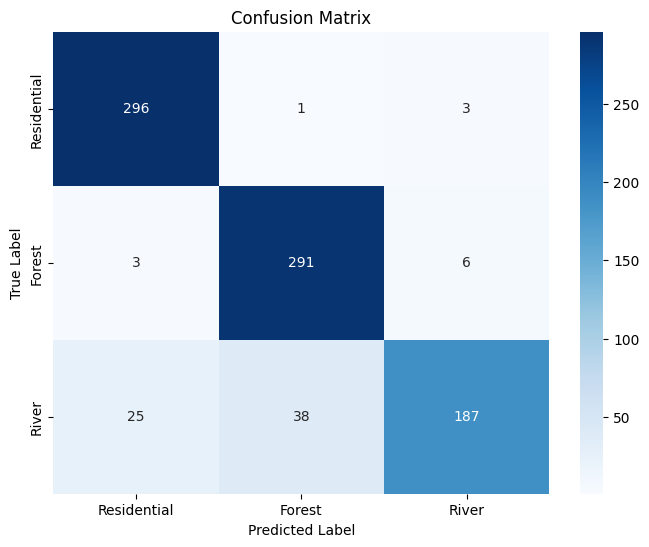

Accuracy: 0.91


In [95]:
# Draw the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_test, most_frequent_label)
# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Residential', 'Forest', 'River'], columns=['Residential', 'Forest', 'River'])
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Compute the accuracy
accuracy = np.mean(most_frequent_label == labels_test)
print(f'Accuracy: {accuracy:.2f}')

## Approach(2): [Mean,std]

### Step(3) Feature Extraction

residential_mean_values [1459.61242793 1214.69271783 1114.49102286 1075.57527226 1287.8791107
 1980.4978606  2286.60519052 2186.58596354  664.42014061   12.281757
 1974.84656675 1382.01246672 2469.38278881]
residential_std_values [189.19456364 286.44481128 329.97030267 478.48869222 384.91964082
 449.80996868 542.60714751 653.57418169 239.92365713   3.5409824
 562.35437106 504.47504365 602.25707054]
forest_mean_values [1109.91998806  811.50463216  687.73663131  415.79315457  748.9670667
 2100.11004078 2688.02510932 2634.13981834  826.21561026    9.93443043
 1312.54340368  535.46771991 3004.78895924]
forest_std_values [109.48091853  87.32800756 100.65931358  85.20257912 195.80533154
 504.57904667 682.29922149 730.01663107 355.93055463   3.93418039
 349.84277498 163.68773131 757.14630599]
river_mean_values [1305.84640495 1040.0083508   929.29521289  719.68389041  935.07587695
 1717.2935778  2069.72560872 1989.32627517  597.78597873   10.55172005
 1310.79475174  726.24864583 2244.20311393]

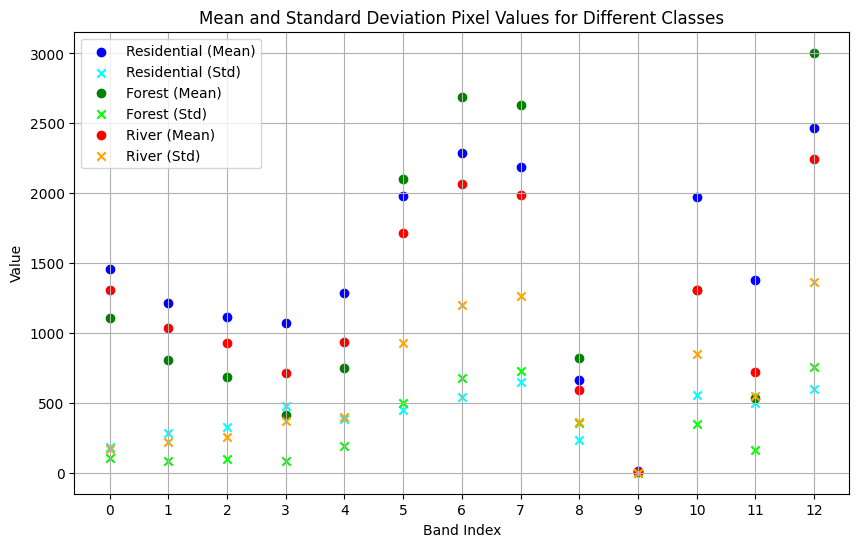

In [20]:
# Assuming you have the mean and standard deviation values calculated for each class and each band
residential_mean_values = np.mean(residential_images_train, axis=(0, 1, 2))
residential_std_values = np.std(residential_images_train, axis=(0, 1, 2))
print("residential_mean_values",residential_mean_values)
print("residential_std_values",residential_std_values)

forest_mean_values = np.mean(forest_images_train, axis=(0, 1, 2))
forest_std_values = np.std(forest_images_train, axis=(0, 1, 2))
print("forest_mean_values",forest_mean_values)
print("forest_std_values",forest_std_values)

river_mean_values = np.mean(river_images_train, axis=(0, 1, 2))
river_std_values = np.std(river_images_train, axis=(0, 1, 2))
print("river_mean_values",river_mean_values)
print("river_std_values",river_std_values)

# Create x-values for the bands
band_indices = np.arange(len(residential_mean_values))

# Plot the mean pixel values for each class as scatter plots
plt.figure(figsize=(10, 6))

# Plot residential mean values
plt.scatter(band_indices, residential_mean_values, color='blue', label='Residential (Mean)', marker='o')
plt.scatter(band_indices, residential_std_values, color='cyan', label='Residential (Std)', marker='x')

# Plot forest mean values
plt.scatter(band_indices, forest_mean_values, color='green', label='Forest (Mean)', marker='o')
plt.scatter(band_indices, forest_std_values, color='lime', label='Forest (Std)', marker='x')

# Plot river mean values
plt.scatter(band_indices, river_mean_values, color='red', label='River (Mean)', marker='o')
plt.scatter(band_indices, river_std_values, color='orange', label='River (Std)', marker='x')

# Set labels and title
plt.xlabel('Band Index')
plt.ylabel('Value')
plt.title('Mean and Standard Deviation Pixel Values for Different Classes')
plt.grid(True)
plt.legend()

# Set x-axis ticks to display band indices from 0 to len(residential_mean_values) - 1
plt.xticks(np.arange(len(residential_mean_values)))

# Show plot
plt.show()


In [96]:
# bands_2=[0,8,12] #0.75
# bands_2=[3,4,6,7,12] #0.84
# bands_2=[0,4,10,11,12] #0.89
bands_2=[0,1,2,3,4,5,6,7,8,9,10,11,12] #0.89


bands_mask_2=np.zeros(num_bands,dtype=bool)
bands_mask_2[bands_2]=True
print("bands_mask",bands_mask_2)

# Zip the mean and standard deviation values for each class and band
# residential_band_stats = list(zip(residential_mean_values[bands_mask_2], residential_std_values[bands_mask_2]))
residential_band_stats = list(zip(residential_mean_values[bands_mask_2]))
print("residential_band_stats",residential_band_stats)

# forest_band_stats = list(zip(forest_mean_values[bands_mask_2], forest_std_values[bands_mask_2]))
forest_band_stats = list(zip(forest_mean_values[bands_mask_2]))
print("forest_band_stats",forest_band_stats)

# river_band_stats = list(zip(river_mean_values[bands_mask_2], river_std_values[bands_mask_2]))
river_band_stats = list(zip(river_mean_values[bands_mask_2]))
print("river_band_stats",river_band_stats)


# Concatenate mean and standard deviation values into feature vectors for each class
residential_features = np.concatenate(residential_band_stats, axis=0)
print("residential_features",residential_features)
forest_features = np.concatenate(forest_band_stats, axis=0)
print("forest_features",forest_features)
river_features = np.concatenate(river_band_stats, axis=0)
print("river_features",river_features)


bands_mask [ True  True  True  True  True  True  True  True  True  True  True  True
  True]
residential_band_stats [(1459.6124279333044,), (1214.692717827691,), (1114.4910228587962,), (1075.5752722620082,), (1287.8791106951678,), (1980.4978606047455,), (2286.6051905201098,), (2186.585963541667,), (664.4201406069155,), (12.281756998697917,), (1974.8465667498554,), (1382.012466724537,), (2469.382788809317,)]
forest_band_stats [(1109.9199880642361,), (811.5046321614583,), (687.7366313114873,), (415.79315456814237,), (748.9670666956018,), (2100.1100407805266,), (2688.0251093207467,), (2634.1398183412907,), (826.21561026114,), (9.93443042896412,), (1312.5434036820022,), (535.4677199074074,), (3004.7889592375577,)]
river_band_stats [(1305.8464049479167,), (1040.0083508029513,), (929.295212890625,), (719.6838904079862,), (935.075876953125,), (1717.2935777994792,), (2069.7256087239584,), (1989.326275173611,), (597.7859787326389,), (10.551720052083333,), (1310.794751736111,), (726.2486458333333

In [97]:
# Compute the mean feature vector for each image
residential_mean_images = np.mean(residential_images_train[:,:,:,bands_mask_2], axis=(1, 2))
forest_mean_images = np.mean(forest_images_train[:,:,:,bands_mask_2], axis=(1, 2))
river_mean_images = np.mean(river_images_train[:,:,:,bands_mask_2], axis=(1, 2))

# Stack the mean feature vectors for each class into a single array
residential_mean_stack = np.stack(residential_mean_images)
forest_mean_stack = np.stack(forest_mean_images)
river_mean_stack = np.stack(river_mean_images)

# Compute the covariance matrix between mean feature vectors
covariance_matrix_residential = np.cov(residential_mean_stack.T)
covariance_matrix_forest = np.cov(forest_mean_stack.T)
covariance_matrix_river = np.cov(river_mean_stack.T)

# Now you have the covariance matrix between mean feature vectors for each class
print("Covariance matrix for residential class:\n", covariance_matrix_residential)
print("Covariance matrix for forest class:\n", covariance_matrix_forest)
print("Covariance matrix for river class:\n", covariance_matrix_river)

Covariance matrix for residential class:
 [[ 3.17329423e+04  3.29154786e+04  3.20193497e+04  4.37200297e+04
   3.63929992e+04  1.15029607e+04  3.42242543e+03  5.41654152e+02
  -1.54065551e+01  2.48861065e+02  2.78794127e+04  3.25548227e+04
  -1.22315479e+03]
 [ 3.29154786e+04  3.81845490e+04  4.24659198e+04  5.99927974e+04
   5.31009941e+04  2.87708172e+04  2.18926090e+04  1.81377911e+04
   4.99908439e+03  2.89668942e+02  5.30021660e+04  5.33598073e+04
   1.77896200e+04]
 [ 3.20193497e+04  4.24659198e+04  5.45360208e+04  7.89231323e+04
   7.44533491e+04  5.58212322e+04  5.22769412e+04  4.74509741e+04
   1.44531361e+04  3.37924740e+02  8.83799800e+04  8.08441738e+04
   5.00997420e+04]
 [ 4.37200297e+04  5.99927974e+04  7.89231323e+04  1.18758457e+05
   1.11392037e+05  7.99062635e+04  7.36973479e+04  6.65021362e+04
   2.04588475e+04  4.79641651e+02  1.38088787e+05  1.28066730e+05
   6.99416944e+04]
 [ 3.63929992e+04  5.31009941e+04  7.44533491e+04  1.11392037e+05
   1.10046678e+05  9.254

### Step(4) MLE

In [98]:
# Step(1) Cal class Priors
p_residential = len(residential_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))
p_forest = len(forest_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))
p_river = len(river_images_train) / (len(residential_images_train) + len(forest_images_train) + len(river_images_train))

print("--------Class Priors---------")
print(f'P(Residential) = {p_residential:.2f}')
print(f'P(Forest) = {p_forest:.2f}')
print(f'P(River) = {p_river:.2f}')

# Step(2) Calculate the mean and standard deviation for each feature for each class
print("\n---------Class Mean & Covariance Matrix----------")
# Compute Mean
# mean_residential = np.mean(residential_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
mean_residential=residential_features
print("Residential Mean: ", mean_residential)
# Compute Covariance Matrix
# covariance_matrix_residential = np.cov(residential_images_train[:,:,:,bands_mask_2].reshape(-1,residential_images_train[:,:,:,bands_mask_2].shape[-1]), rowvar=False)
print("Residential Covariance Matrix:\n", covariance_matrix_residential)



# Compute Mean
# # mean_forest = np.mean(forest_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
mean_forest=forest_features
print("Forest Mean: ", mean_forest)
# Compute Covariance Matrix
# covariance_matrix_forest = np.cov(forest_images_train[:,:,:,bands_mask_2].reshape(-1,forest_images_train[:,:,:,bands_mask_2].shape[-1]), rowvar=False)
print("Forest Covariance Matrix:\n", covariance_matrix_forest)


# Compute Mean
# mean_river = np.mean(river_images_train[:,:,:,bands_mask],axis=(0, 1, 2))
mean_river=river_features
print("River Mean: ", mean_river)
# Compute Covariance Matrix
# covariance_matrix_river = np.cov(river_images_train[:,:,:,bands_mask_2].reshape(-1,river_images_train[:,:,:,bands_mask_2].shape[-1]), rowvar=False)
print("River Covariance Matrix:\n", covariance_matrix_river)

--------Class Priors---------
P(Residential) = 0.35
P(Forest) = 0.35
P(River) = 0.29

---------Class Mean & Covariance Matrix----------
Residential Mean:  [1459.61242793 1214.69271783 1114.49102286 1075.57527226 1287.8791107
 1980.4978606  2286.60519052 2186.58596354  664.42014061   12.281757
 1974.84656675 1382.01246672 2469.38278881]
Residential Covariance Matrix:
 [[ 3.17329423e+04  3.29154786e+04  3.20193497e+04  4.37200297e+04
   3.63929992e+04  1.15029607e+04  3.42242543e+03  5.41654152e+02
  -1.54065551e+01  2.48861065e+02  2.78794127e+04  3.25548227e+04
  -1.22315479e+03]
 [ 3.29154786e+04  3.81845490e+04  4.24659198e+04  5.99927974e+04
   5.31009941e+04  2.87708172e+04  2.18926090e+04  1.81377911e+04
   4.99908439e+03  2.89668942e+02  5.30021660e+04  5.33598073e+04
   1.77896200e+04]
 [ 3.20193497e+04  4.24659198e+04  5.45360208e+04  7.89231323e+04
   7.44533491e+04  5.58212322e+04  5.22769412e+04  4.74509741e+04
   1.44531361e+04  3.37924740e+02  8.83799800e+04  8.08441738e+0

In [67]:
from scipy.stats import multivariate_normal
images_test=np.vstack([residential_images_test[:,:,:,bands_mask_2],forest_images_test[:,:,:,bands_mask_2],river_images_test[:,:,:,bands_mask_2]])
labels_test=np.hstack([np.zeros(len(residential_images_test)),np.ones(len(forest_images_test)),2*np.ones(len(river_images_test))])

# Step(3) Calculate the likelihood of the test data for each class
print("\n---------Likelihood of Test Data----------")

likelihood_residential = multivariate_normal.pdf( np.mean(images_test[:,:,:,:], axis=(1, 2)), mean=mean_residential, cov=covariance_matrix_residential)
posterior_residential=p_residential*likelihood_residential


likelihood_forest = multivariate_normal.pdf(np.mean(images_test[:,:,:,:], axis=(1, 2)), mean=mean_forest, cov=covariance_matrix_forest)
posterior_forest=p_forest*likelihood_forest


likelihood_river = multivariate_normal.pdf(np.mean(images_test[:,:,:,:], axis=(1, 2)), mean=mean_river, cov=covariance_matrix_river)
posterior_river=p_river*likelihood_river

predictions=[]
# Iterate over the posterior probabilities for each example
for res_posterior, forest_posterior, river_posterior in zip(posterior_residential, posterior_forest, posterior_river):
    # Get the class prediction for the current example by selecting the class with the highest posterior probability
    class_prediction = np.argmax([res_posterior, forest_posterior, river_posterior])

    predictions.append(class_prediction)

print(predictions)


---------Likelihood of Test Data----------
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1

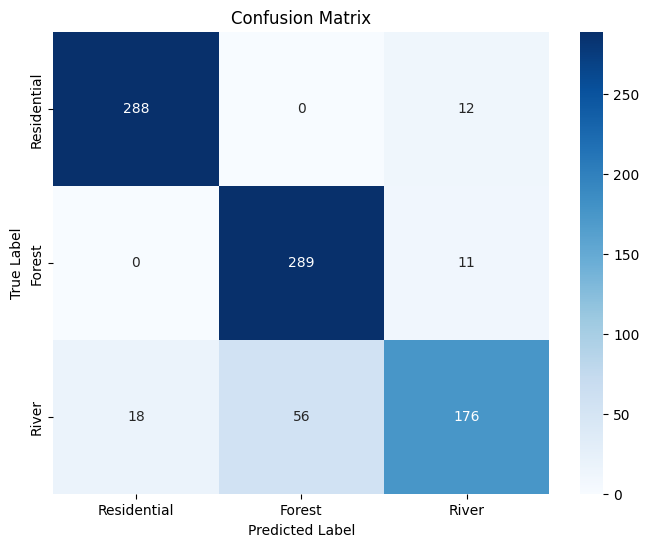

Accuracy: 0.89


In [99]:
# Draw the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_test, predictions)
# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Residential', 'Forest', 'River'], columns=['Residential', 'Forest', 'River'])
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# Compute the accuracy
accuracy = np.mean(predictions == labels_test)
print(f'Accuracy: {accuracy:.2f}')

## Approach(3): [SIFT Feature Extraction]

### Step(3) Feature Extraction

In [68]:
# bands_3=[1,2,3]

# bands_mask_3=np.zeros(num_bands,dtype=bool)
# bands_mask_3[bands_3]=True
# print("bands_mask",bands_mask_3)

bands_mask [False  True  True  True False False False False False False False False
 False]


In [79]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

### Step(4) MLE

In [ ]:
from scipy.stats import multivariate_normal
images_test=np.vstack([residential_images_test[:,:,:,bands_mask_2],forest_images_test[:,:,:,bands_mask_2],river_images_test[:,:,:,bands_mask_2]])
labels_test=np.hstack([np.zeros(len(residential_images_test)),np.ones(len(forest_images_test)),2*np.ones(len(river_images_test))])


# Initialize SIFT detector
sift = cv2.SIFT_create()



# Find the keypoints and descriptors with SIFT
kp, des = sift.detectAndCompute(images_test[:,:,:,bands_3], None)
print(np.shape(kp))


### Grading Rubric (Total: 10 Marks)

The lab is graded based on the following criteria:

1. **Data Loading and Preparation (2 Marks)**
   - Correctly loads images for the residential, river, and forest classes. (0.5 Marks)
   - Accurately splits the dataset into training and testing subsets and clearly shows this split. (1.5 Marks)

2. **Feature Extraction (2 Marks)**
   - Implements feature extraction appropriately, considering the curse of dimensionality. (1 Mark)
   - Extracts and justifies the selection of features relevant to distinguishing the classes. (1 Mark)

3. **Implementation of MLE Classifier (3 Marks)**
   - Correctly calculates and clearly shows class priors and class-specific parameters. (1 Mark)
   - Accurately computes likelihoods using the likelihood equation (probability density function) and classifies based on maximum likelihood. Must clearly show these calculations and explain the choice of likelihood equation. (2 Marks)

4. **Model Evaluation and Understanding (3 Marks)**
   - Shows **confusion matrix** and correctly calculates and clearly shows the calculations for Accuracy and Average F1 Score. (1 Mark)
   - **Comparison amongst your peers.** Compares the model's performance against those of peers to identify strengths and areas for improvement. (2 Marks)

Each section of the lab will be evaluated on completeness, and correctness in approach and analysis. Part of the rubric also includes the student's ability to explain and justify their choices and results.


## Submission Instructions

To ensure a smooth evaluation process, please follow these steps for submitting your work:

1. **Prepare Your Submission:** Alongside your main notebook, include any additional files that are necessary for running the notebook successfully. This might include data files, images, or supplementary scripts.

2. **Rename Your Files:** Before submission, please rename your notebook to reflect the IDs of the two students working on this project. The format should be `ID1_ID2`, where `ID1` and `ID2` are the student IDs. For example, if the student IDs are `9123456` and `9876543`, then your notebook should be named `9123456_9876543.ipynb`.

3. **Check for Completeness:** Ensure that all required tasks are completed and that the notebook runs from start to finish without errors. This step is crucial for a smooth evaluation.

4. **Submit Your Work:** Once everything is in order, submit your notebook and any additional files via the designated submission link on Google Classroom **(code: 2yj6e24)**. Make sure you meet the submission deadline to avoid any late penalties.
5. Please, note that the same student should submit the assignments for the pair throughout the semester.

By following these instructions carefully, you help us in evaluating your work efficiently and fairly **and any failure to adhere to these guidelines can affect your grades**. If you encounter any difficulties or have questions about the submission process, please reach out as soon as possible.

We look forward to seeing your completed projects and wish you the best of luck!
